### Exercício 04 – Criando relatórios em função do arquivo dados-vendas.xlsx.

a) Crie um dataframe, utilizando o arquivo dados-vendas.xlsx. Crie data frames
para dividir a planilha vendas em 4 arquivos. São eles:

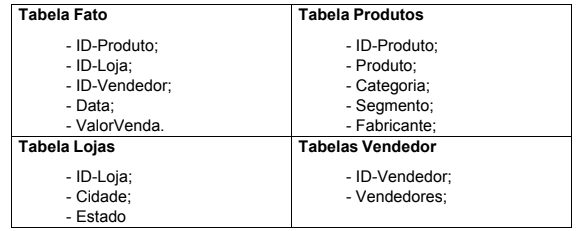

In [25]:
# importando arquivo e criando data frarme

import pandas as pd

caminhoarq = '../mike-ferreira-python/Arquivos/dados-vendas.xlsx'

df = pd.read_excel(caminhoarq)

df.head()



,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89


### Dividir o dataframe em 4 tabelas

- Tabela Fato

- Dimensão Produto

- Dimensão Vendedor

- Dimensão Lojas

In [24]:
# Importando o módulo OS

import os

### Criando uma pasta no diretório atual
os.mkdir('./relatorios-ex05')

FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: './relatorios-ex05'

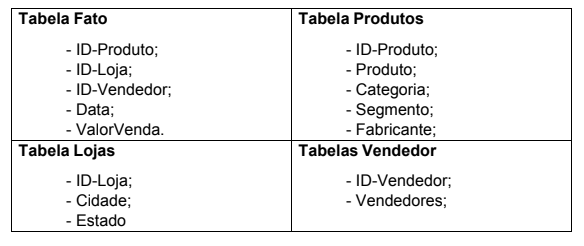

In [32]:
# Exemplo Selcionar tudo >>> df.loc [:,:]

# Exemplo todas as linhas mas só duas colunas >>> df.loc [:,['A','B']]


# Criando tabela fato
tbl_fato = df.loc[:,['ID-Produto','Loja','ID-Vendedor','Data Venda','ValorVenda']]

tbl_fato = tbl_fato.rename(columns ={'Loja':'ID-Loja'})

tbl_fato.to_excel('./relatorios-ex05/tabelaFato.xlsx')



In [38]:
# Criando tabela produtos

tbl_produtos = df.loc[:,['ID-Produto','Produto','Categoria','Segmento','Fabricante']]

# verificação duplicadas e removendo duplicadas

tbl_produtos.duplicated().sum()

tbl_produtos.drop_duplicates()

# gerando arquivo

tbl_produtos.to_excel('./relatorios-ex05/tabelaProdutos.xlsx')




In [39]:
# Criando tabela Lojas

tbl_lojas = df.loc[:,['Loja','Cidade','Estado']]

tbl_lojas = tbl_fato.rename(columns ={'Loja':'ID-Loja'})

# verificação duplicadas e removendo duplicadas

tbl_lojas.duplicated().sum()

tbl_lojas.drop_duplicates()

# gerando arquivo

tbl_lojas.to_excel('./relatorios-ex05/tabelaLojas.xlsx')



In [50]:

# Criando tabela vendedor

tbl_vendedores = df.loc[:,['ID-Vendedor','Vendedor']]

# verificação duplicadas e removendo duplicadas

tbl_vendedores.duplicated().sum()

tbl_vendedores.drop_duplicates()

# gerando arquivo 

tbl_vendedores.to_excel('./relatorios-ex05/tabelaVendedor.xlsx')

### b) Com base na coluna Vendedor, construa um código que permita remover as duplicadas da coluna informada, e na sequência, filtre o dataframe e gere um relatório individual para cada vendedor. Para fazer isso, siga os procedimentos a seguir:

1. Crie uma pasta chamada relatórios-vendedores;

2. Importe a biblioteca Pandas;

3. Declare uma variável chamada path para armazenar o caminho da pasta criada;

4. Declare uma variável com o nome file para armazenar o nome doarquivo que será manipulado;

5. Crie um dataframe chamado dados e utilize o comando pd.read_excel para acessar o arquivo.

6. Visualize o cabeçalho do dataframe; 

7. Crie um dataframe chamado df_vendedores, para atribuir valores a ele você deve selecionar apenas a coluna Vendedores e remover as duplicadas do mesmo. Confirme se realmente o comando removeu as duplicadas. Após isso, crie uma lista com o seguinte nome listaVendedores, essa lista deve receber os dados do dataframe df_vendedores. Para isso, você deve converter o dataframe em lista, utilize o comando dataframe.tolist().

8. Construa uma estrutura de repetição (FOR) para que a variável vendedor receba os nomes que estão na lista listaVendedores e filtre o dataframe dados, utilizando a coluna Vendedores para que gere um novo dataframe (df_final) para cada vendedor. Ainda na estrutura de repetição, você deve inserir uma linha de código para gerar um arquivo em Excel para cada vendedor, utilize o comando dataframe.to_excel.


In [77]:
# 1. Crie uma pasta chamada relatórios-vendedores;

os.mkdir('./relatorios-ex05/vendedores')

# 2 selecionar a coluna vendedor e remover as duplicadas 

df_vendedores = df['Vendedor'].drop_duplicates()

# 3 Converter o dataframe em lista

vendedores = df_vendedores.to_list()

# 4 estruturar a repetição para filtrar o dataframe

df.head()

for vendedor in vendedores:

    print('Filtrando...',vendedor)

    df_final = df [df['Vendedor'] == vendedor]
    
    df_final.to_excel('./relatorios-ex05/vendedores/' + vendedor + '.xlsx', index = False)


FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: './relatorios-ex05/vendedores'

In [83]:
# 1. Crie uma pasta chamada lojas;

os.mkdir('./relatorios-ex05/lojas')



FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: './relatorios-ex05/lojas'

In [92]:
# 2 selecionar a coluna loja e remover as duplicadas 

df_lojas = df['Loja'].drop_duplicates()

#3 Converter o dataframe em lista

lojas = df_lojas.to_list()

# 4 estruturar a repetição para filtrar o dataframe

df.head()

for loja in lojas:

    print('Filtrando...',loja)

    df_final = df [df['Loja'] == loja]
    
    df_final.to_excel('./relatorios-ex05/lojas/' + loja + '.xlsx', index = False)


Filtrando... SP8821
Filtrando... A9990
Filtrando... SP8823
Filtrando... R1296
Filtrando... V7654
Filtrando... P0761
Filtrando... SA7761
Filtrando... SP8822
Filtrando... S6543
Filtrando... B7659
Filtrando... A9991
Filtrando... R1298
Filtrando... R1295
Filtrando... R1297
